# **WeatherAUS Rain Prediction: A Machine Learning Approach**

A study by Serhet Gökdemir. [Visit my portfolio](https://serhetgokdemir.github.io)

## **Chapters**<br>

**1. Exploratory Data Analysis and Data Preparation**
*   Exploratory Data Analysis
*   Data Preparation<br>

**2. Metrics Reasoning**<br>

**3. Modeling**
*   Logistic Regression
*   K-Nearest Neighbors (KNN)
*   Naive Bayes
*   SVM
*   The ROC Curve and Calculation AUC Were Analyzed for Each Model
*   Handling Imbalanced Data<br>

**4. Conclusion**<br>

**5. Further Steps to Take**




## **1. EDA And Data Preparation**

First of all we need to set up the environment for the data analysis. The codes below used for importing the necessary libraries, making Google Drive usable and reading the CSV file.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/Colab Notebooks/Classification/weatherAUS.csv"
data = pd.read_csv(file_path, delimiter=',')
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The target is: `RainTomorrow`

### 1.1 **EDA**

In [ ]:
data.shape

(145460, 23)

In [ ]:
data.dtypes

,0
Date,object
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
display(data.describe())

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.00,144199.00,142199.00,82670.00,75625.00,135197.00,143693.00,142398.00,142806.00,140953.00,130395.00,130432.00,89572.00,86102.00,143693.00,141851.00
mean,12.19,23.22,2.36,5.47,7.61,40.04,14.04,18.66,68.88,51.54,1017.65,1015.26,4.45,4.51,16.99,21.68
std,6.40,7.12,8.48,4.19,3.79,13.61,8.92,8.81,19.03,20.80,7.11,7.04,2.89,2.72,6.49,6.94
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40
25%,7.60,17.90,0.00,2.60,4.80,31.00,7.00,13.00,57.00,37.00,1012.90,1010.40,1.00,2.00,12.30,16.60
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10
75%,16.90,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.40
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70


In [ ]:
display(data.describe(include='object'))

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [ ]:
data.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


I will use many different plots. So I want to use "Set2" color setting for them because set2 has a good contrast and median lines look easily when we use pastel colors in box plots.

In [ ]:
sns.set_palette("pastel")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=sns.color_palette("Set2"))

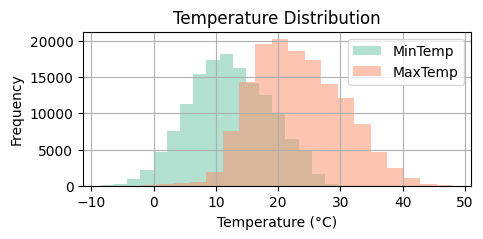

In [ ]:
plt.figure(figsize=(5,2))
data['MinTemp'].hist(bins=20, alpha=0.5)
data['MaxTemp'].hist(bins=20, alpha=0.5)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend(['MinTemp', 'MaxTemp'])
plt.show()

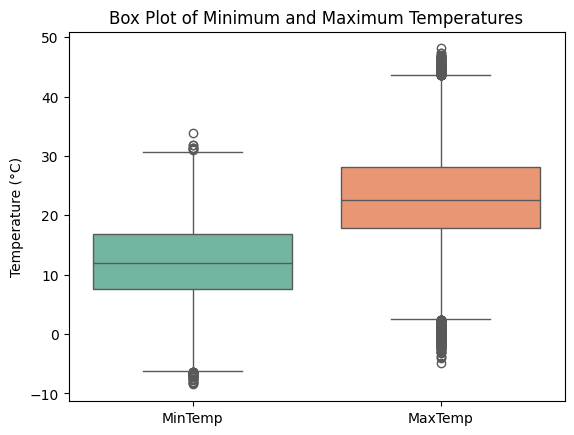

In [ ]:
sns.boxplot(data=data[['MinTemp', 'MaxTemp']])
plt.title('Box Plot of Minimum and Maximum Temperatures')
plt.ylabel('Temperature (°C)')
plt.show()

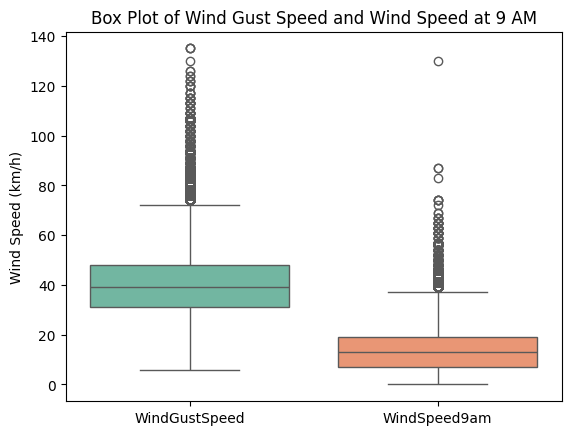

In [ ]:
sns.boxplot(data=data[['WindGustSpeed', 'WindSpeed9am']])
plt.title('Box Plot of Wind Gust Speed and Wind Speed at 9 AM')
plt.ylabel('Wind Speed (km/h)')
plt.show()

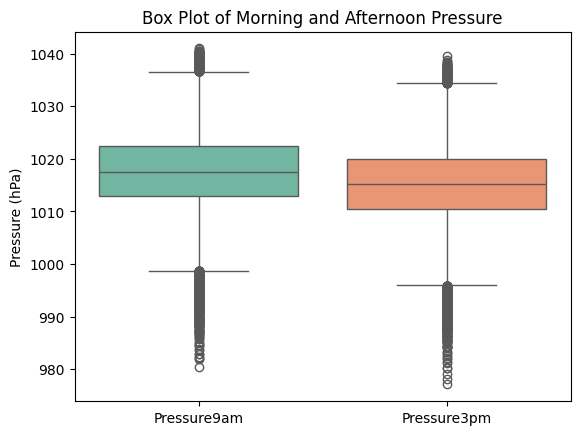

In [ ]:
sns.boxplot(data=data[['Pressure9am', 'Pressure3pm']])
plt.title('Box Plot of Morning and Afternoon Pressure')
plt.ylabel('Pressure (hPa)')
plt.show()

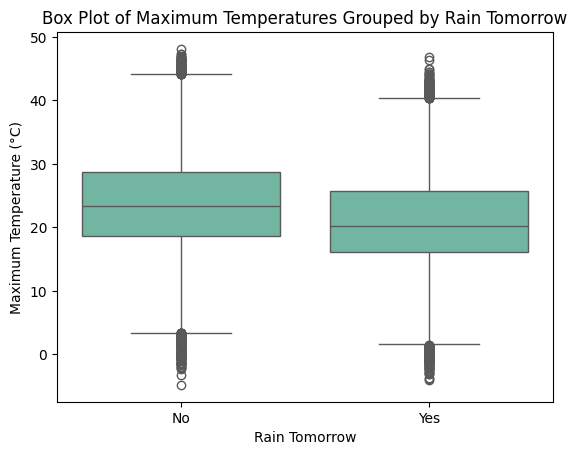

In [ ]:
sns.boxplot(x='RainTomorrow', y='MaxTemp', data=data)
plt.title('Box Plot of Maximum Temperatures Grouped by Rain Tomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Maximum Temperature (°C)')
plt.show()

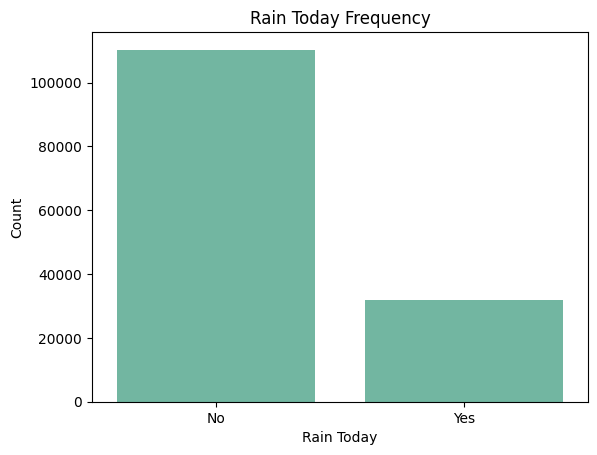

In [ ]:
sns.countplot(data=data, x='RainToday')
plt.title('Rain Today Frequency')
plt.xlabel('Rain Today')
plt.ylabel('Count')
plt.show()

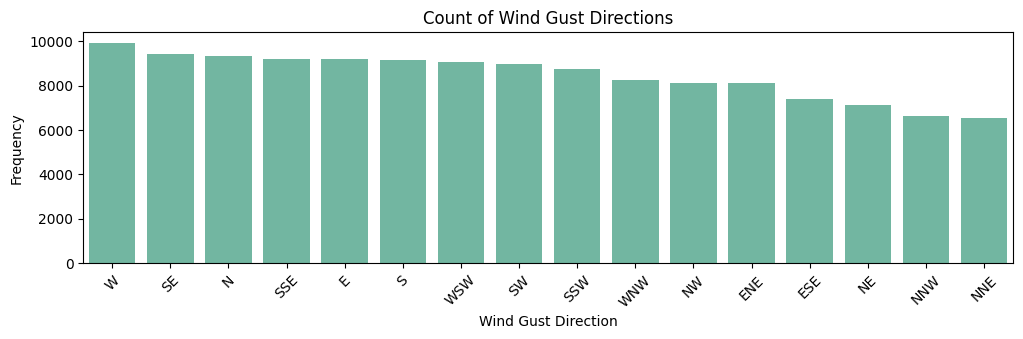

In [ ]:
plt.figure(figsize=(12,3))
sns.countplot(x='WindGustDir', data=data, order=data['WindGustDir'].value_counts().index)
plt.title('Count of Wind Gust Directions')
plt.xlabel('Wind Gust Direction')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

**!! The plot below shows the frequency of rain and no-rain predictions for the next day, categorized by whether it rained today:**

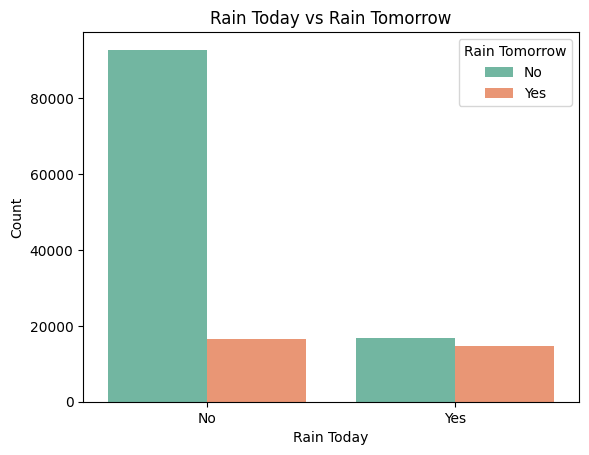

In [ ]:
sns.countplot(x='RainToday', hue='RainTomorrow', data=data)
plt.title('Rain Today vs Rain Tomorrow')
plt.xlabel('Rain Today')
plt.ylabel('Count')
plt.legend(title='Rain Tomorrow')
plt.show()

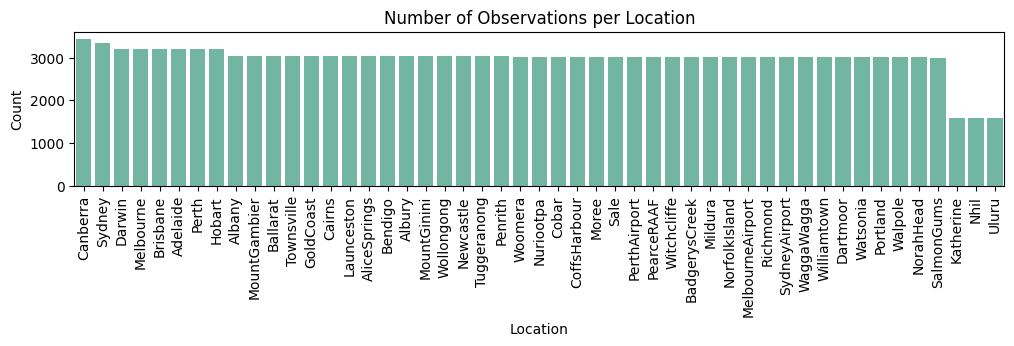

In [ ]:
plt.figure(figsize=(12,2))
sns.countplot(x='Location', data=data, order=data['Location'].value_counts().index)
plt.title('Number of Observations per Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

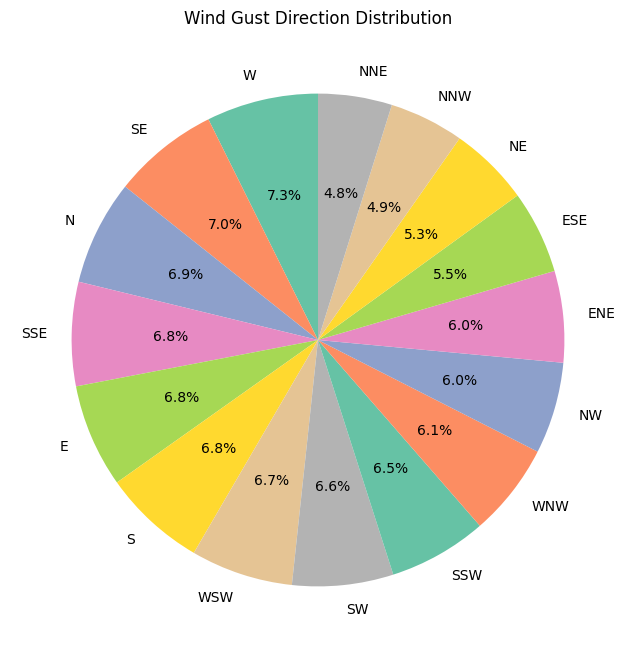

In [ ]:
wind_gust_counts = data['WindGustDir'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(wind_gust_counts, labels=wind_gust_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Wind Gust Direction Distribution')
plt.show()

### 1.2 **Data Preparation**

In [ ]:
numerical_data = ["MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am",
                  "WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm",
                  "Temp9am","Temp3pm"]
categorical_data = ["Location","WindGustDir","WindDir9am","WindDir3pm"]
target = ["RainTomorrow"]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
data.fillna(data[numerical_data].median(), inplace=True)
data['RainTomorrow'].fillna('No', inplace=True)
data['RainToday'].fillna('No', inplace=True)
data.fillna('Unknown', inplace=True)

In [ ]:
data.drop('Date', axis=1, inplace=True)

In [ ]:
label_encoder = LabelEncoder()
data['RainToday'] = label_encoder.fit_transform(data['RainToday'])
data['RainTomorrow'] = label_encoder.fit_transform(data['RainTomorrow'])

In [ ]:
data = pd.get_dummies(data, columns=categorical_data, drop_first=True)

In [ ]:
scaler = StandardScaler()
X = data.drop('RainTomorrow', axis=1)
X = scaler.fit_transform(X)

y = data['RainTomorrow']

Now let's check the data.

In [ ]:
display(data.describe())

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00
mean,12.19,23.22,2.31,5.18,7.99,39.96,14.03,18.67,68.90,51.55,1017.64,1015.25,4.66,4.71,16.99,21.67,0.22,0.22
std,6.37,7.09,8.39,3.18,2.76,13.12,8.86,8.72,18.86,20.47,6.73,6.66,2.28,2.11,6.45,6.85,0.41,0.41
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40,0.00,0.00
25%,7.70,18.00,0.00,4.00,8.20,31.00,7.00,13.00,57.00,37.00,1013.50,1011.10,3.00,4.00,12.30,16.70,0.00,0.00
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10,0.00,0.00
75%,16.80,28.20,0.60,5.20,8.70,46.00,19.00,24.00,83.00,65.00,1021.80,1019.40,6.00,6.00,21.50,26.20,0.00,0.00
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70,1.00,1.00


In [ ]:
data.shape

(145460, 114)

In [ ]:
data.isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
...,...
WindDir3pm_SW,0
WindDir3pm_Unknown,0
WindDir3pm_W,0
WindDir3pm_WNW,0


In [ ]:
print(data.dtypes)

MinTemp               float64
MaxTemp               float64
Rainfall              float64
Evaporation           float64
Sunshine              float64
                       ...   
WindDir3pm_SW            bool
WindDir3pm_Unknown       bool
WindDir3pm_W             bool
WindDir3pm_WNW           bool
WindDir3pm_WSW           bool
Length: 114, dtype: object


In [ ]:
bool_columns = data.select_dtypes(include=['bool']).columns
data[bool_columns] = data[bool_columns].astype(int)

## **2. Metrics Reasoning**

**Let's overview the metrics first.**

`Accuracy:` This metric tells us how often the model gets it right, calculating the proportion of all predictions (correct ones and errors) that are correct. But beware, if the data isn't balanced (say, most days don’t have rain), accuracy might not give a true picture of how well the model predicts rain.

`Precision:` Think of precision as the trustworthiness of the model when it predicts rain—it shows how many of the "rainy" predictions were actually correct. This is particularly important when a false alarm (predicting rain when it's sunny) has significant consequences.

`Recall (Sensitivity):` This measures how good the model is at catching all the rainy days. It's key when missing a rainy day (predicting sun when it rains) could have serious implications, like missing the chance to prepare for a storm.

`F1 Score:` Since precision and recall are both important but focus on different aspects, the F1 Score helps balance them. It combines precision and recall into a single number, giving a sense of the model’s overall accuracy without favoring either catching all rainy days or being sure when it predicts rain.

`ROC-AUC:` This shows how well the model can distinguish between rainy and non-rainy days under different conditions. The area under the curve (AUC) tells us about the likelihood of the model correctly ranking a randomly chosen rainy day over a non-rainy one.

**Justifications for Choosing Specific Metrics:**

`Precision and Recall:` These metrics become central depending on what's at stake with false predictions. If failing to predict rain (a false negative) is worse, maybe due to safety concerns, you’d focus more on recall. If mistakenly predicting rain (a false positive) is costlier, perhaps due to the economic cost of unnecessary precautions, precision takes the lead.

`F1 Score:` Useful when you need a single measure to weigh both types of errors equally—when it’s equally bad to call a sunny day rainy and to miss predicting a storm.

`ROC-AUC:` This is great for comparing different models to see which one is better at making the right call between rainy and non-rainy days, particularly useful when your data for rain vs. no rain is skewed.

## **3. Modelling**

### Required Libraries

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


### 3.1 **Logistic Regression**

Best parameters: {'C': 1, 'penalty': 'l2'}
Best accuracy: 0.8461236393778577


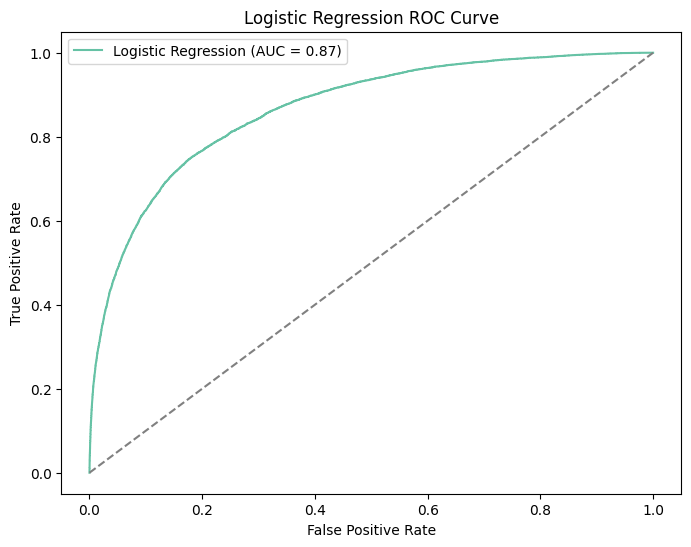

In [ ]:
X = data.drop('RainTomorrow', axis=1)
y = data['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'C': [0.1, 1],
    'penalty': ['l2']
}

log_reg = LogisticRegression(solver='liblinear', max_iter=1000)

log_reg_cv = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
log_reg_cv.fit(X_train, y_train)

print("Best parameters:", log_reg_cv.best_params_)
print("Best accuracy:", log_reg_cv.best_score_)

### 3.2 **K-Nearest Neighbors (KNN)**

In [ ]:
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for k={k}: {accuracy:.2f}')

Accuracy for k=1: 0.79
Accuracy for k=3: 0.82
Accuracy for k=5: 0.83
Accuracy for k=7: 0.84
Accuracy for k=9: 0.84


### 3.3 **Naive Bayes**

In [ ]:
nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.65


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[21591 12396]
 [ 2876  6775]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.64      0.74     33987
           1       0.35      0.70      0.47      9651

    accuracy                           0.65     43638
   macro avg       0.62      0.67      0.60     43638
weighted avg       0.77      0.65      0.68     43638



###3.4 **SVM**


In [ ]:
svm = SVC(kernel='linear', random_state=42, max_iter=1000)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.41


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[10036 23951]
 [ 1674  7977]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.30      0.44     33987
           1       0.25      0.83      0.38      9651

    accuracy                           0.41     43638
   macro avg       0.55      0.56      0.41     43638
weighted avg       0.72      0.41      0.43     43638



### 3.5 **The ROC Curve and Calculation AUC Were Analyzed for Each Model**

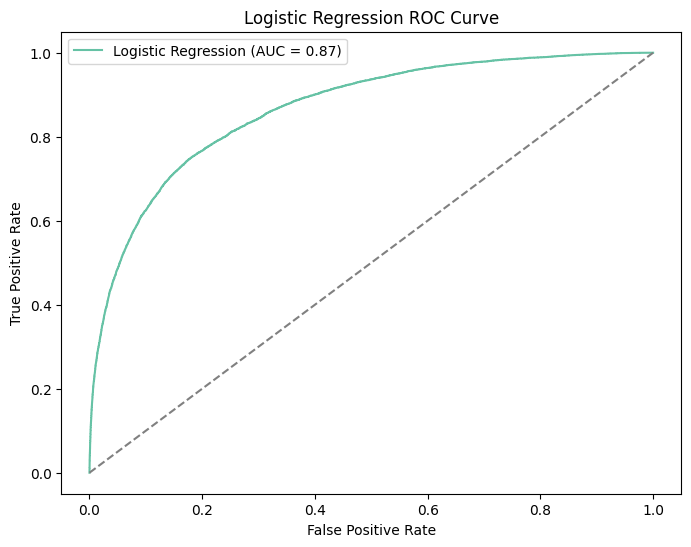

In [ ]:
best_log_reg = log_reg_cv.best_estimator_
y_proba_log_reg = best_log_reg.predict_proba(X_test)[:, 1]

fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_proba_log_reg)
auc_log_reg = roc_auc_score(y_test, y_proba_log_reg)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()


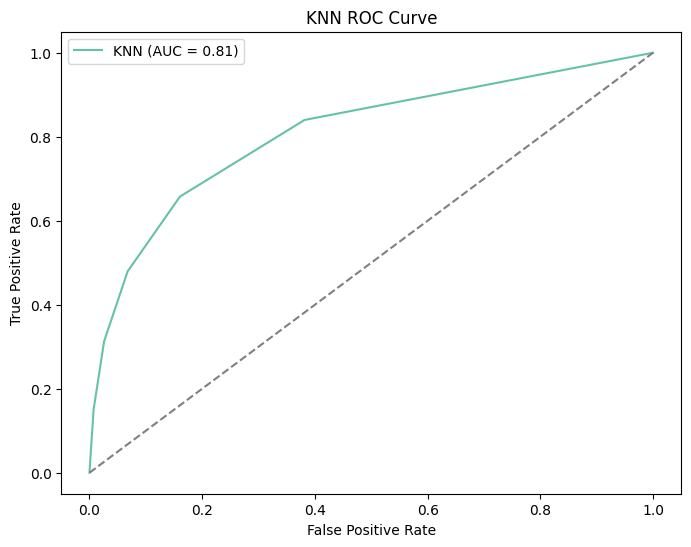

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_proba_knn = knn.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_proba_knn)
auc_knn = roc_auc_score(y_test, y_proba_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend()
plt.show()

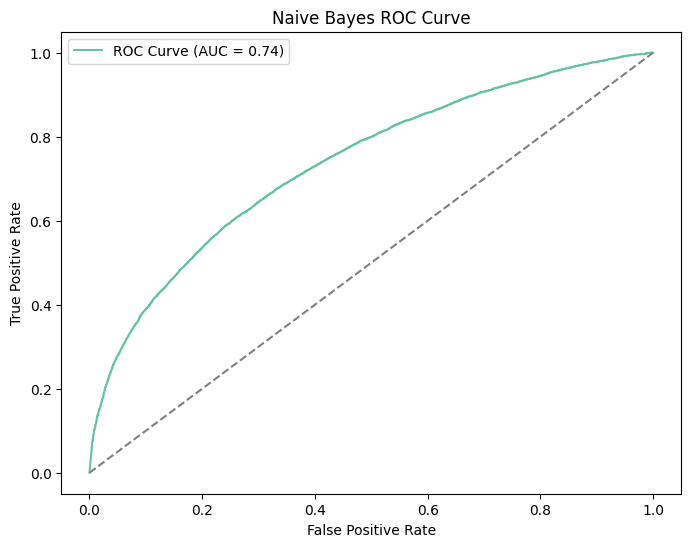

In [ ]:
y_proba = nb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend()
plt.show()


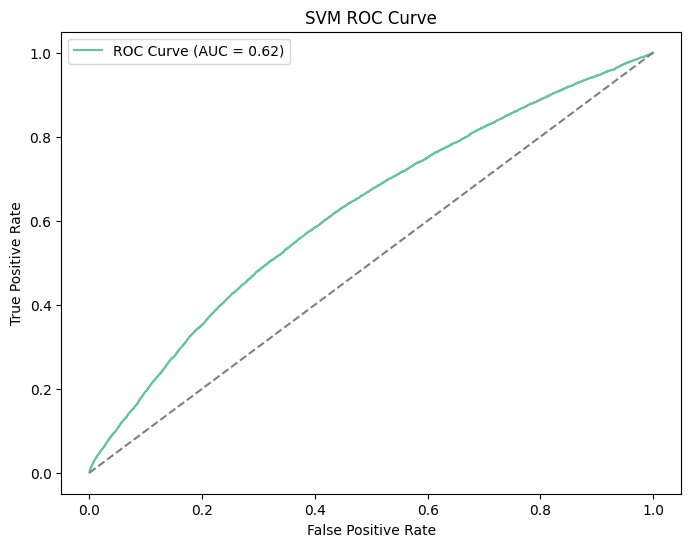

In [ ]:
y_proba = svm.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend()
plt.show()


### 3.6 **Handling Imbalanced Data**

In [ ]:
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

over_sampler = SMOTE(sampling_strategy='auto', random_state=42)

X_res, y_res = over_sampler.fit_resample(X_train, y_train)

## **4. Conclusion**

In this project, we applied various **machine learning** models to predict the likelihood of rain the next day using the **weatherAUS dataset**. The task involved handling an imbalanced dataset, evaluating model performance using **accuracy, ROC curves, and AUC scores**, and implementing strategies to deal with data imbalance.

We started by applying **Logistic Regression**, followed by **K-Nearest Neighbors (KNN)**, **Naive Bayes**, and **Support Vector Machine (SVM)** models. Among these, Logistic Regression performed with an accuracy of approximately **84.6%**, indicating its robustness for this classification task. KNN, while slightly less accurate, showed reasonable performance, and the Naive Bayes and SVM models were tested to understand their impact under different conditions.

To address the issue of class imbalance, we experimented with various techniques such as **under-sampling**, **over-sampling**, and **SMOTE (Synthetic Minority Over-sampling Technique)**. By balancing the dataset, we aimed to prevent the models from biasing toward the majority class, thereby improving their performance on the minority class.

The ROC curve and AUC score analysis revealed that SVM and Logistic Regression models achieved the highest AUC values, confirming their superior ability to discriminate between the classes, while KNN showed slightly lower performance in this regard.

Ultimately, this project demonstrated the importance of carefully selecting the right model and handling imbalanced datasets in classification tasks. Future improvements could involve fine-tuning model parameters further, exploring more advanced resampling techniques, and experimenting with ensemble methods for better performance.

## **5. Further Steps to Take**

In future work, several improvements can be made to enhance the model performance and address any remaining challenges:

1. **Hyperparameter Tuning:** Further fine-tuning of hyperparameters for all models (e.g., learning rate, number of neighbors, kernel type in SVM) could improve model accuracy and robustness.

2. **Advanced Resampling Techniques:** Experiment with more sophisticated resampling methods, such as ADASYN or SMOTEENN, to better handle imbalanced data.

3. **Ensemble Methods:** Implement ensemble methods such as Random Forests or Gradient Boosting to combine multiple models and improve predictive power.

4. **Feature Engineering:** Investigate additional features or transformations, such as interaction terms or time-based features, to enhance model understanding of patterns in the data.

By exploring these steps, model performance can be further improved, and more reliable predictions can be achieved.